# **4. Time Series**

## *Table of Contents*

1. [Data Cleaning](./02_Data_Cleaning.ipynb)
2. [EDA and Feature Engineering](./03_Exploratory_Data_Analysis.ipynb)
3. [Regression Modelling](./04_Regression_Modelling.ipynb)
4. [**Time_Series**](./05_Time_Series.ipynb)
   1. [*Library Imports*](#Library-Imports)
   2. [*File Importation*](#File-Importation)
   3. [*Setup data for Time Series*](#Setup-data-for-Time-Series)
   4. [*Moving Average*](#Moving-Average)

## **Library Imports**

### Standard library imports

In [1]:
import os  # Provides a way of using operating system dependent functionality

### Third-party imports

In [2]:
import matplotlib.dates as mdates  # Handling date formats in matplotlib
import matplotlib.pyplot as plt  # Plotting library for creating static, interactive visualizations
import numpy as np  # Scientific computing library
import pandas as pd  # Data manipulation and analysis library
import seaborn as sns  # Data

## **File Importation**

In [3]:
# Determine the absolute path to the directory containing the current script
script_dir = os.path.dirname(os.path.dirname(os.getcwd()))

# Construct the path to the data file
data_path = os.path.join(script_dir, '01_Data_Cleaning', '1_cleaned_melb_data.csv')

# Load dataset containing cleaned Melbourne housing data
melb_data = pd.read_csv(data_path, parse_dates=['Date'])

## **Setup data for Time Series**

In [4]:
# Sorting by date and aggregating average price and count of houses
melb_data.sort_values(by='Date', inplace=True)
date_avgprice = melb_data.groupby('Date')['Price'].agg(['mean', 'count']).reset_index().set_index('Date')
date_avgprice.rename(columns={'mean': 'average_price', 'count': 'num_of_houses'}, inplace=True)

## **Moving Average**

In [5]:
# Calculating rolling average price over a 7-day window
date_avgprice['rolling_average_price'] = date_avgprice['average_price'].rolling(7).mean()

### Plotting

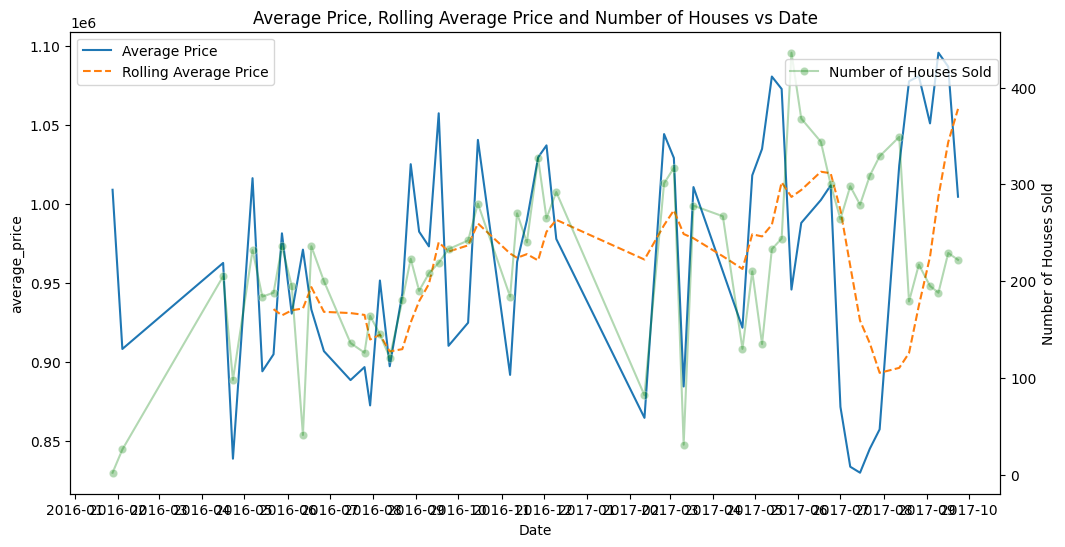

In [6]:
# Plotting Average Price, Rolling Average Price, and Total Number of Houses Sold vs Date
plt.figure(figsize=(12, 6))

# Format the date axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Plot average and rolling average prices
sns.lineplot(data=date_avgprice, x='Date', y='average_price', label='Average Price', linestyle='-')
sns.lineplot(data=date_avgprice, x='Date', y='rolling_average_price', label='Rolling Average Price', linestyle='--')

# Creating a second Y-axis for number of houses sold
ax2 = plt.gca().twinx()

# Plot number of houses sold on the secondary Y-axis
sns.lineplot(data=date_avgprice, x='Date', y='num_of_houses', label='Number of Houses Sold', color='g', ax=ax2, marker='o', alpha=0.3)

# Setting up legends and labels
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)
ax2.legend(loc='upper right', bbox_to_anchor=(0.997, 0.94), borderaxespad=0)
plt.title('Average Price, Rolling Average Price and Number of Houses vs Date')
plt.xlabel('Date')
plt.ylabel('Price')
ax2.set_ylabel('Number of Houses Sold')

# Display the plot
plt.show()